                  method  size  density       cycles  l1_cache_references  \
0         hashing_SpGEMM    32    0.001      4575366              1430220   
1    hashing_SpGEMM_NEON    32    0.001      4577362              1445581   
2           spArr_SpGEMM    32    0.001      4273963              1433562   
3      spArr_SpGEMM_NEON    32    0.001      4378229              1432922   
4         hashing_SpGEMM    64    0.001      4801054              1565460   
..                   ...   ...      ...          ...                  ...   
211    spArr_SpGEMM_NEON  4096    0.010   2816793456           1844187232   
212       hashing_SpGEMM  8192    0.010  45824016516          47988748795   
213  hashing_SpGEMM_NEON  8192    0.010  61650219700          55671379795   
214         spArr_SpGEMM  8192    0.010  14237129999           9817721337   
215    spArr_SpGEMM_NEON  8192    0.010  14015609391           9821188634   

     l1_cache_misses  l1_cache_miss_rate  llc_references  llc_misses  \
0  

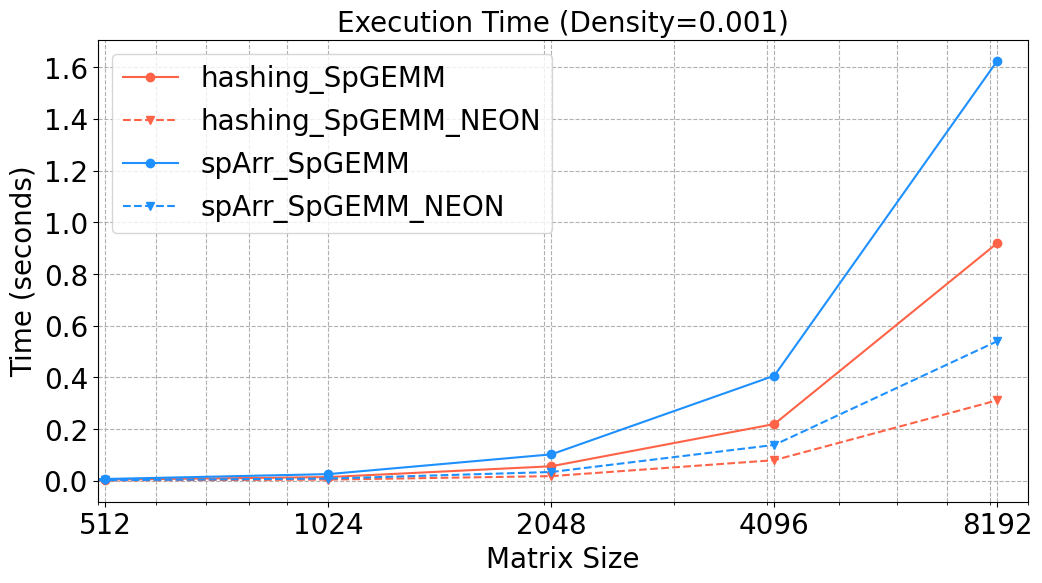

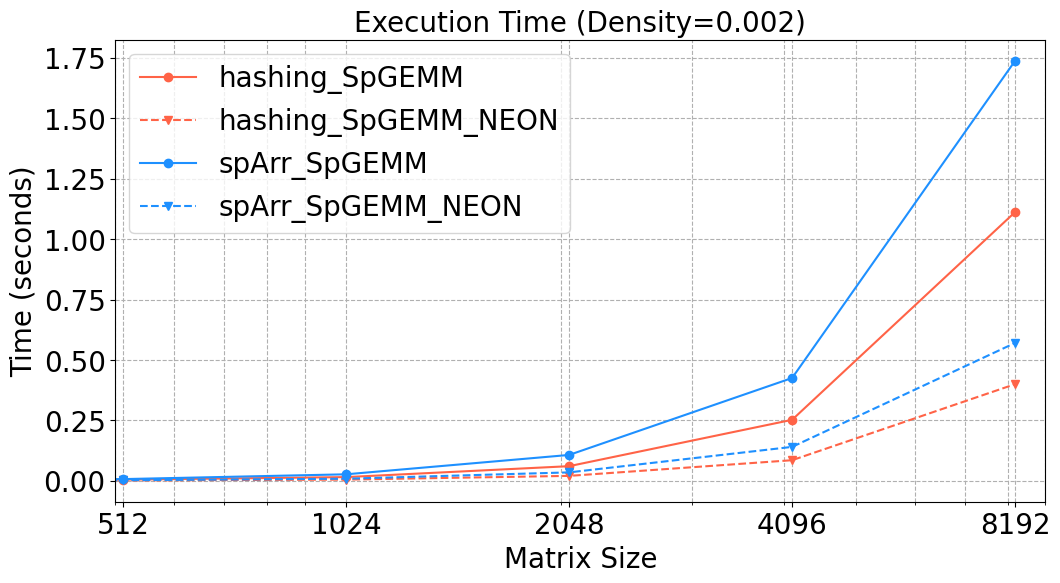

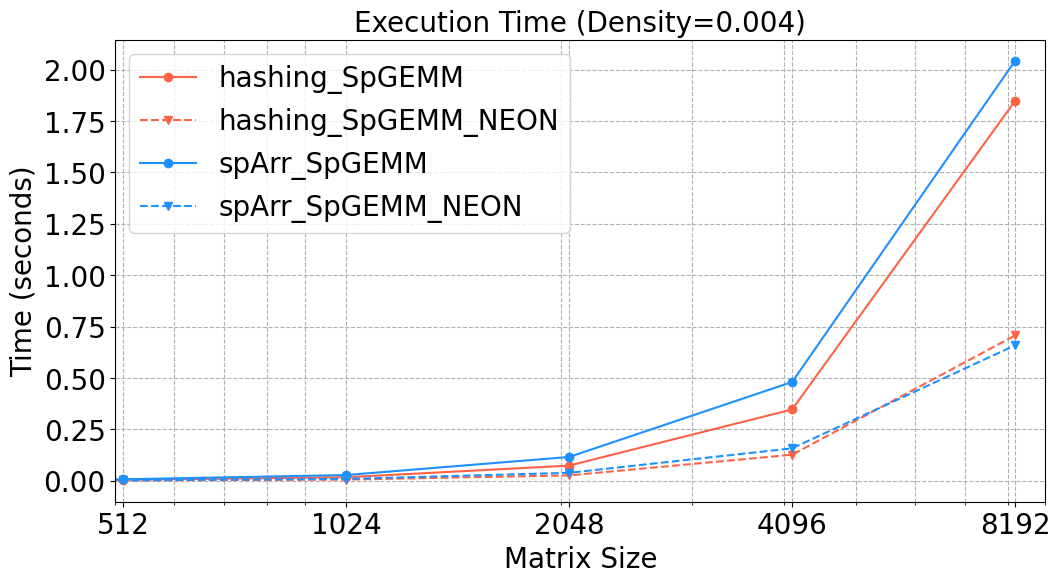

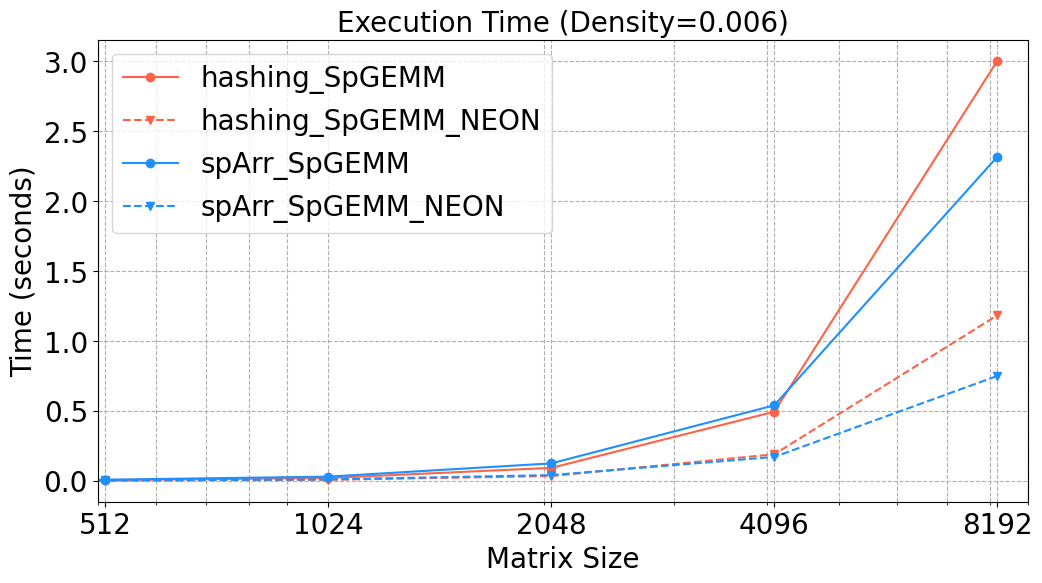

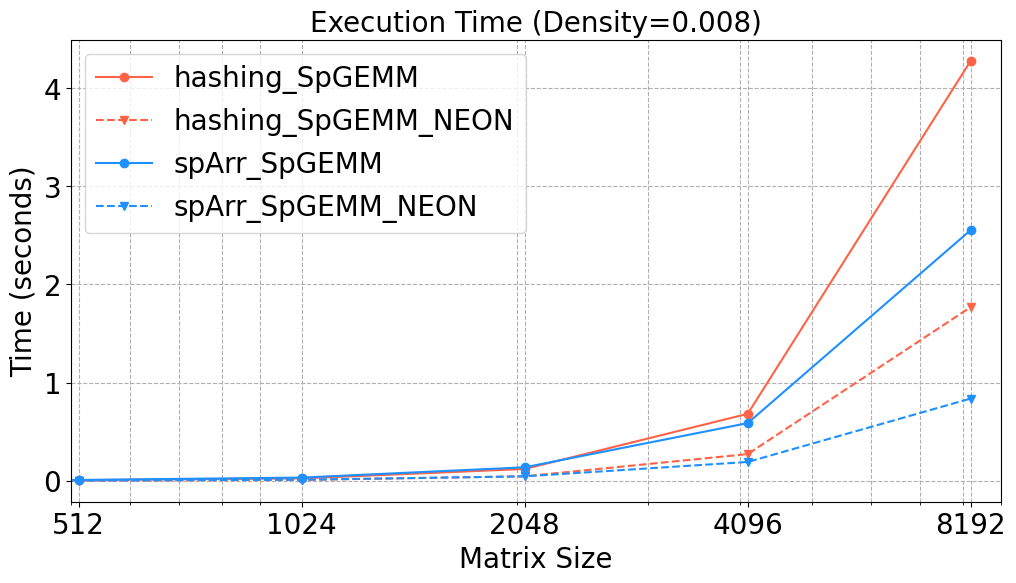

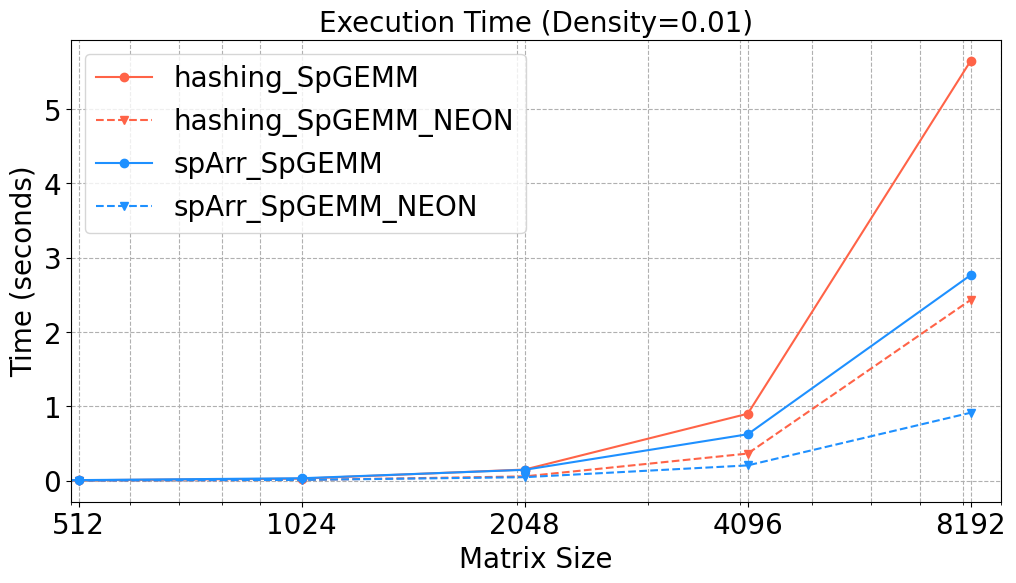

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = '/Users/edlin/Desktop/Courses/UoE_Sem2/Dissertation/exp_data/perf_data_0730.txt'

# Read data from file
data = []
with open(file_path, 'r') as file:
    lines = file.readlines()
    current_entry = {}
    for line in lines:
        if 'O(n^3)' in line or 'hashing_SpGEMM' in line or 'hashing_SpGEMM_NEON' in line or 'spArr_SpGEMM' in line or 'spArr_SpGEMM_NEON' in line :
            # Save the current entry and start a new one
            if current_entry:
                data.append(current_entry)
            parts = line.split() # Read the method, size, and density
            current_entry = {'method': parts[0], 'size': int(parts[1]), 'density': float(parts[2])}
        elif 'cycles' in line:
            current_entry['cycles'] = int(line.split()[0].replace(',', ''))
        elif 'cache-references' in line:
            current_entry['l1_cache_references'] = int(line.split()[0].replace(',', ''))
        elif 'cache-misses' in line:
            current_entry['l1_cache_misses'] = int(line.split()[0].replace(',', ''))  # cache misses
            current_entry['l1_cache_miss_rate'] = float(line.split()[3].strip('%'))  # cache miss rate
        elif 'LLC-loads' in line:
            current_entry['llc_references'] = int(line.split()[0].replace(',', ''))
        elif 'LLC-load-misses' in line:
            current_entry['llc_misses'] = int(line.split()[0].replace(',', ''))
            current_entry['llc_miss_rate'] = float(line.split()[3].strip('%'))  # LLC miss rate
        elif 'TLB-loads' in line:
            current_entry['tlb_references'] = int(line.split()[0].replace(',', ''))
        elif 'TLB-load-misses' in line:
            current_entry['tlb_misses'] = int(line.split()[0].replace(',', ''))
            current_entry['tlb_miss_rate'] = float(line.split()[3].strip('%'))  # TLB miss rate
        elif 'seconds time elapsed' in line:
            current_entry['time_elapsed'] = float(line.split()[0])
    # Save the last entry
    if current_entry:
        data.append(current_entry)

# Get DataFrame
df = pd.DataFrame(data)

# Plot function
def plot_data(df, metric, density, include_on3 = True):
    plt.figure(figsize=(12, 6))
    methods = df['method'].unique()
    
    if not include_on3:
        methods = [method for method in methods if method != 'O(n^3)']
    
    for method in methods:
        subset = df[(df['method'] == method) & (df['density'] == density)]
        if 'hashing' in method:
            color = '#FF6347'
            linestyle = '-'
        elif 'spArr' in method:
            color = '#1E90FF'
            linestyle = '-'
        else:
            color = 'black'
            linestyle = '-'
            
        if method == 'spArr_SpGEMM_NEON' or method == 'hashing_SpGEMM_NEON':
            plt.plot(subset['size'], subset[metric] / 3, marker='v', label=method, color=color, linestyle='--')
        else:
            plt.plot(subset['size'], subset[metric], marker='o', label=method, color=color, linestyle=linestyle)
    
    plt.xlabel('Matrix Size', fontsize=20)
    plt.xlim(500, 9000)
    
    # Title and y-axis label
    if metric == 'time_elapsed':
        plt.ylabel('Time (seconds)', fontsize=20)
        plt.title(f'Execution Time (Density={density})', fontsize=20)
    elif metric == 'cycles':
        plt.ylabel('CPU Cycles', fontsize=16)
        plt.title(f'Total Cycles (Density={density})', fontsize=20)
    # L1 Cache
    elif metric == 'l1_cache_references':
        plt.ylabel('L1 Cache References', fontsize=16)
        plt.title(f'L1 Cache References (Density={density})', fontsize=20)
    elif metric == 'l1_cache_misses':
        plt.ylabel('L1 Cache Misses', fontsize=16)
        plt.title(f'L1 Cache Misses (Density={density})', fontsize=20)
    elif metric == 'l1_cache_miss_rate':
        plt.ylabel('L1 Cache Miss Rate (%)', fontsize=16)
        plt.title(f'L1 Cache Miss Rate (Density={density})', fontsize=20)
    # LLC
    elif metric == 'llc_references':
        plt.ylabel('L3 Cache References', fontsize=16)
        plt.title(f'L3 Cache References (Density={density})', fontsize=20)
    elif metric == 'llc_misses':
        plt.ylabel('L3 Cache Misses', fontsize=16)
        plt.title(f'L3 Cache Misses(Density={density})', fontsize=20)
    elif metric == 'llc_miss_rate':
        plt.ylabel('L3 Cache Miss Rate (%)', fontsize=16)
        plt.title(f'L3 Cache Miss Rate (Density={density})', fontsize=20)
    # TLB
    elif metric == 'tlb_references':
        plt.ylabel('TLB References', fontsize=16)
        plt.title(f'TLB References (Density={density})', fontsize=20)
    elif metric == 'tlb_misses':
        plt.ylabel('TLB Misses', fontsize=16)
        plt.title(f'TLB Misses (Density={density})', fontsize=20)
    elif metric == 'tlb_miss_rate':
        plt.ylabel('TLB Miss Rate (%)', fontsize=16)
        plt.title(f'TLB Miss Rate (Density={density})', fontsize=20)
    else:
        plt.ylabel(metric.replace('_', ' ').title())
        plt.title(f'{metric.replace("_", " ").title()} (Density={density})', fontsize=20)
        
    
    # Set the title and show the legend
    title_metric = metric.replace('_', ' ').title()
    # plt.title(f'{title_metric} vs Matrix Size (Density={density})')
    plt.legend(fontsize=20)
    plt.grid(True, which="both", ls="--")  # 显示主要和次要网格线
    
    # Set the x-axis and y-axis to a logarithmic scale
    plt.xscale('log')
    # plt.yscale('log')
    
    # Set the x-axis to a logarithmic scale
    # x_ticks = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
    x_ticks = [512, 1024, 2048, 4096, 8192]
    
    plt.xticks(x_ticks, labels=[str(tick) for tick in x_ticks], fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.show()

# Metrics and densities
# metrics = ['time_elapsed', 'cycles', 'l1_cache_references', 'l1_cache_misses', 'l1_cache_miss_rate', 'llc_references', 'llc_misses', 'llc_miss_rate', 'tlb_references', 'tlb_misses', 'tlb_miss_rate']
metrics = ['time_elapsed']
densities = [0.001, 0.002, 0.004, 0.006, 0.008, 0.01]

print(df)

include_on3 = False  # 设置是否包含 O(n^3)
for density in densities:
    for metric in metrics:
        plot_data(df, metric, density, include_on3)


In [12]:
df

,method,size,density,cycles,l1_cache_references,l1_cache_misses,l1_cache_miss_rate,llc_references,llc_misses,llc_miss_rate,tlb_references,tlb_misses,tlb_miss_rate,time_elapsed
0,hashing_SpGEMM,32,0.001,4575366,1430220,29946,2.09,57851,27989,48.38,1430254,4745,0.33,0.001729
1,hashing_SpGEMM_NEON,32,0.001,4577362,1445581,29890,2.07,55877,27266,48.80,1445612,5108,0.35,0.001680
2,spArr_SpGEMM,32,0.001,4273963,1433562,29143,2.03,49926,26365,52.81,1433606,5083,0.35,0.001577
3,spArr_SpGEMM_NEON,32,0.001,4378229,1432922,28856,2.01,51607,27192,52.69,1433014,4801,0.34,0.001744
4,hashing_SpGEMM,64,0.001,4801054,1565460,31846,2.03,61082,29068,47.59,1565516,5395,0.34,0.001711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,spArr_SpGEMM_NEON,4096,0.010,2816793456,1844187232,7983436,0.43,11879872,8877163,74.72,1844189094,693638,0.04,0.619901
212,hashing_SpGEMM,8192,0.010,45824016516,47988748795,72842713,0.15,62143955,32439694,52.20,47988770832,4207433,0.01,5.651874
213,hashing_SpGEMM_NEON,8192,0.010,61650219700,55671379795,73989933,0.13,61981227,32530689,52.48,55671411714,4301119,0.01,7.304166
214,spArr_SpGEMM,8192,0.010,14237129999,9817721337,46610951,0.47,63895746,48736776,76.28,9817729390,3142417,0.03,2.768232
